In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [4]:
y   = load('../../March2021/Observation_models/ObsY.joblib').sel(time=slice('1980-12-1','2014-1-31'))
CNN = load('../../March2021/Observation_models/CNNY.joblib').sel(time=slice('1980-12-1','2014-1-31'))
LR  = load('../../March2021/Observation_models/LRY.joblib').sel(time=slice('1980-12-1','2014-1-31'))
SVR  = load('../../March2021/Observation_models/SVRY.joblib').sel(time=slice('1980-12-1','2014-1-31'))

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
CanESM5_CNN = load('CanESM5-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
IITMESM_CNN = load('IITM-ESM-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
INM_CM4_8_CNN = load('INM-CM4-8-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
MIROC6_CNN = load('MIROC6-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
MRI_ESM2_0_CNN = load('MRI-ESM2-0-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
EC_Earth3_CNN = load('EC-Earth3-CNN-Y.joblib').sel(time=slice('1980-12-1','2014-1-31'))
y


<xarray.DataArray 'fogdata' (time: 2108)>
array([0.12, 0.12, 0.12, ..., 0.72, 0.68, 0.56])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-01 1980-12-02 ... 2014-01-31

In [30]:
dateString=[]
for i in y.time.values :
    dateString.append(np.datetime_as_string(i, unit='D'))
dateString[2107]

'2014-01-31'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

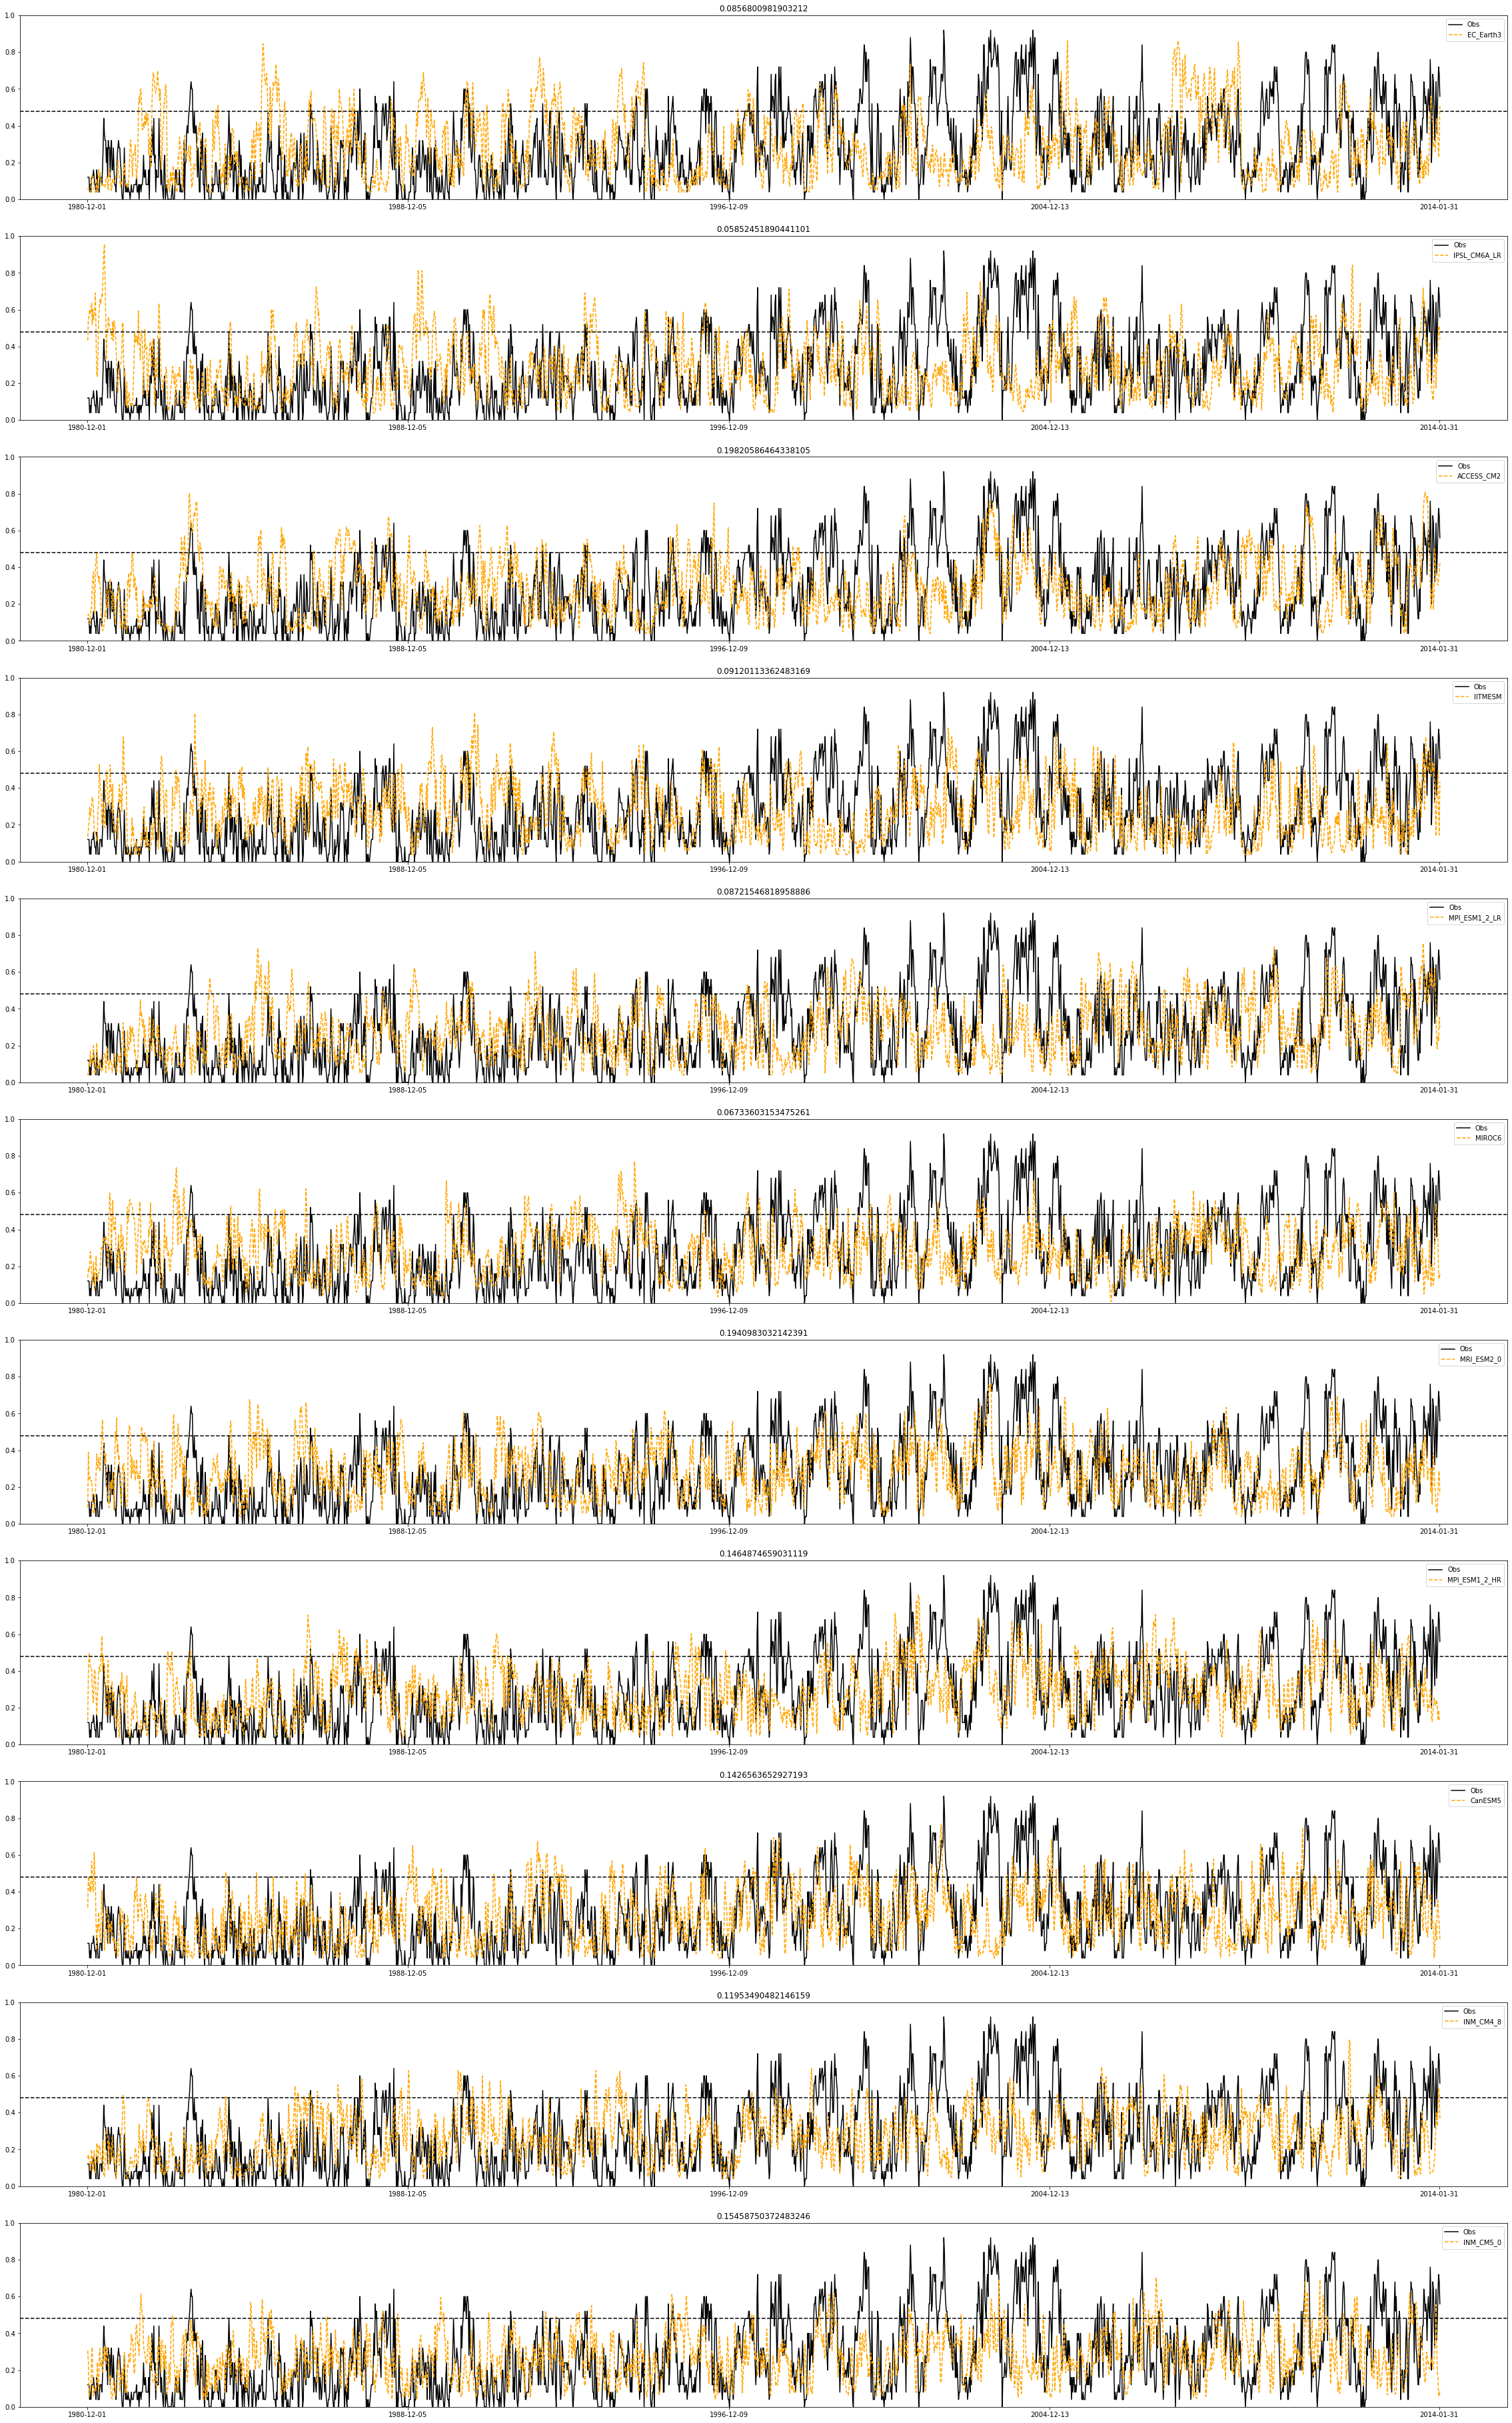

In [32]:
models=(EC_Earth3_CNN,IPSL_CM6A_LR_CNN,ACCESS_CM2_CNN,IITMESM_CNN,MPI_ESM1_2_LR_CNN,
        MIROC6_CNN,MRI_ESM2_0_CNN,MPI_ESM1_2_HR_CNN,
        CanESM5_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN)
modelNames=['EC_Earth3','IPSL_CM6A_LR','ACCESS_CM2','IITMESM',
            'MPI_ESM1_2_LR','MIROC6','MRI_ESM2_0',
        'MPI_ESM1_2_HR','CanESM5','INM_CM4_8',
        'INM_CM5_0']

fig, ax = plt.subplots(11, 1,figsize=(40,66))
#plt.figure(figsize=(40,110))
X=np.arange(1,y.shape[0]+1)
for m,mn,ax1 in zip(models,modelNames,ax):
    ax1.plot(X,y,label='Obs',color='black')
    ax1.plot(X,m,label=mn,color='orange',ls='--')
    l1=ax1.axhline(0.48,color='black',ls='--')
    ax1.set_xticks([0,500,1000,1500,2107])
    ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2107]])   
    ax1.set_ylim([0, 1])
    ax1.set_title(np.corrcoef(y,m)[0,1])
    ax1.legend()
plt.savefig('Models_dailyTS_models11.eps')
plt.show() 

    
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

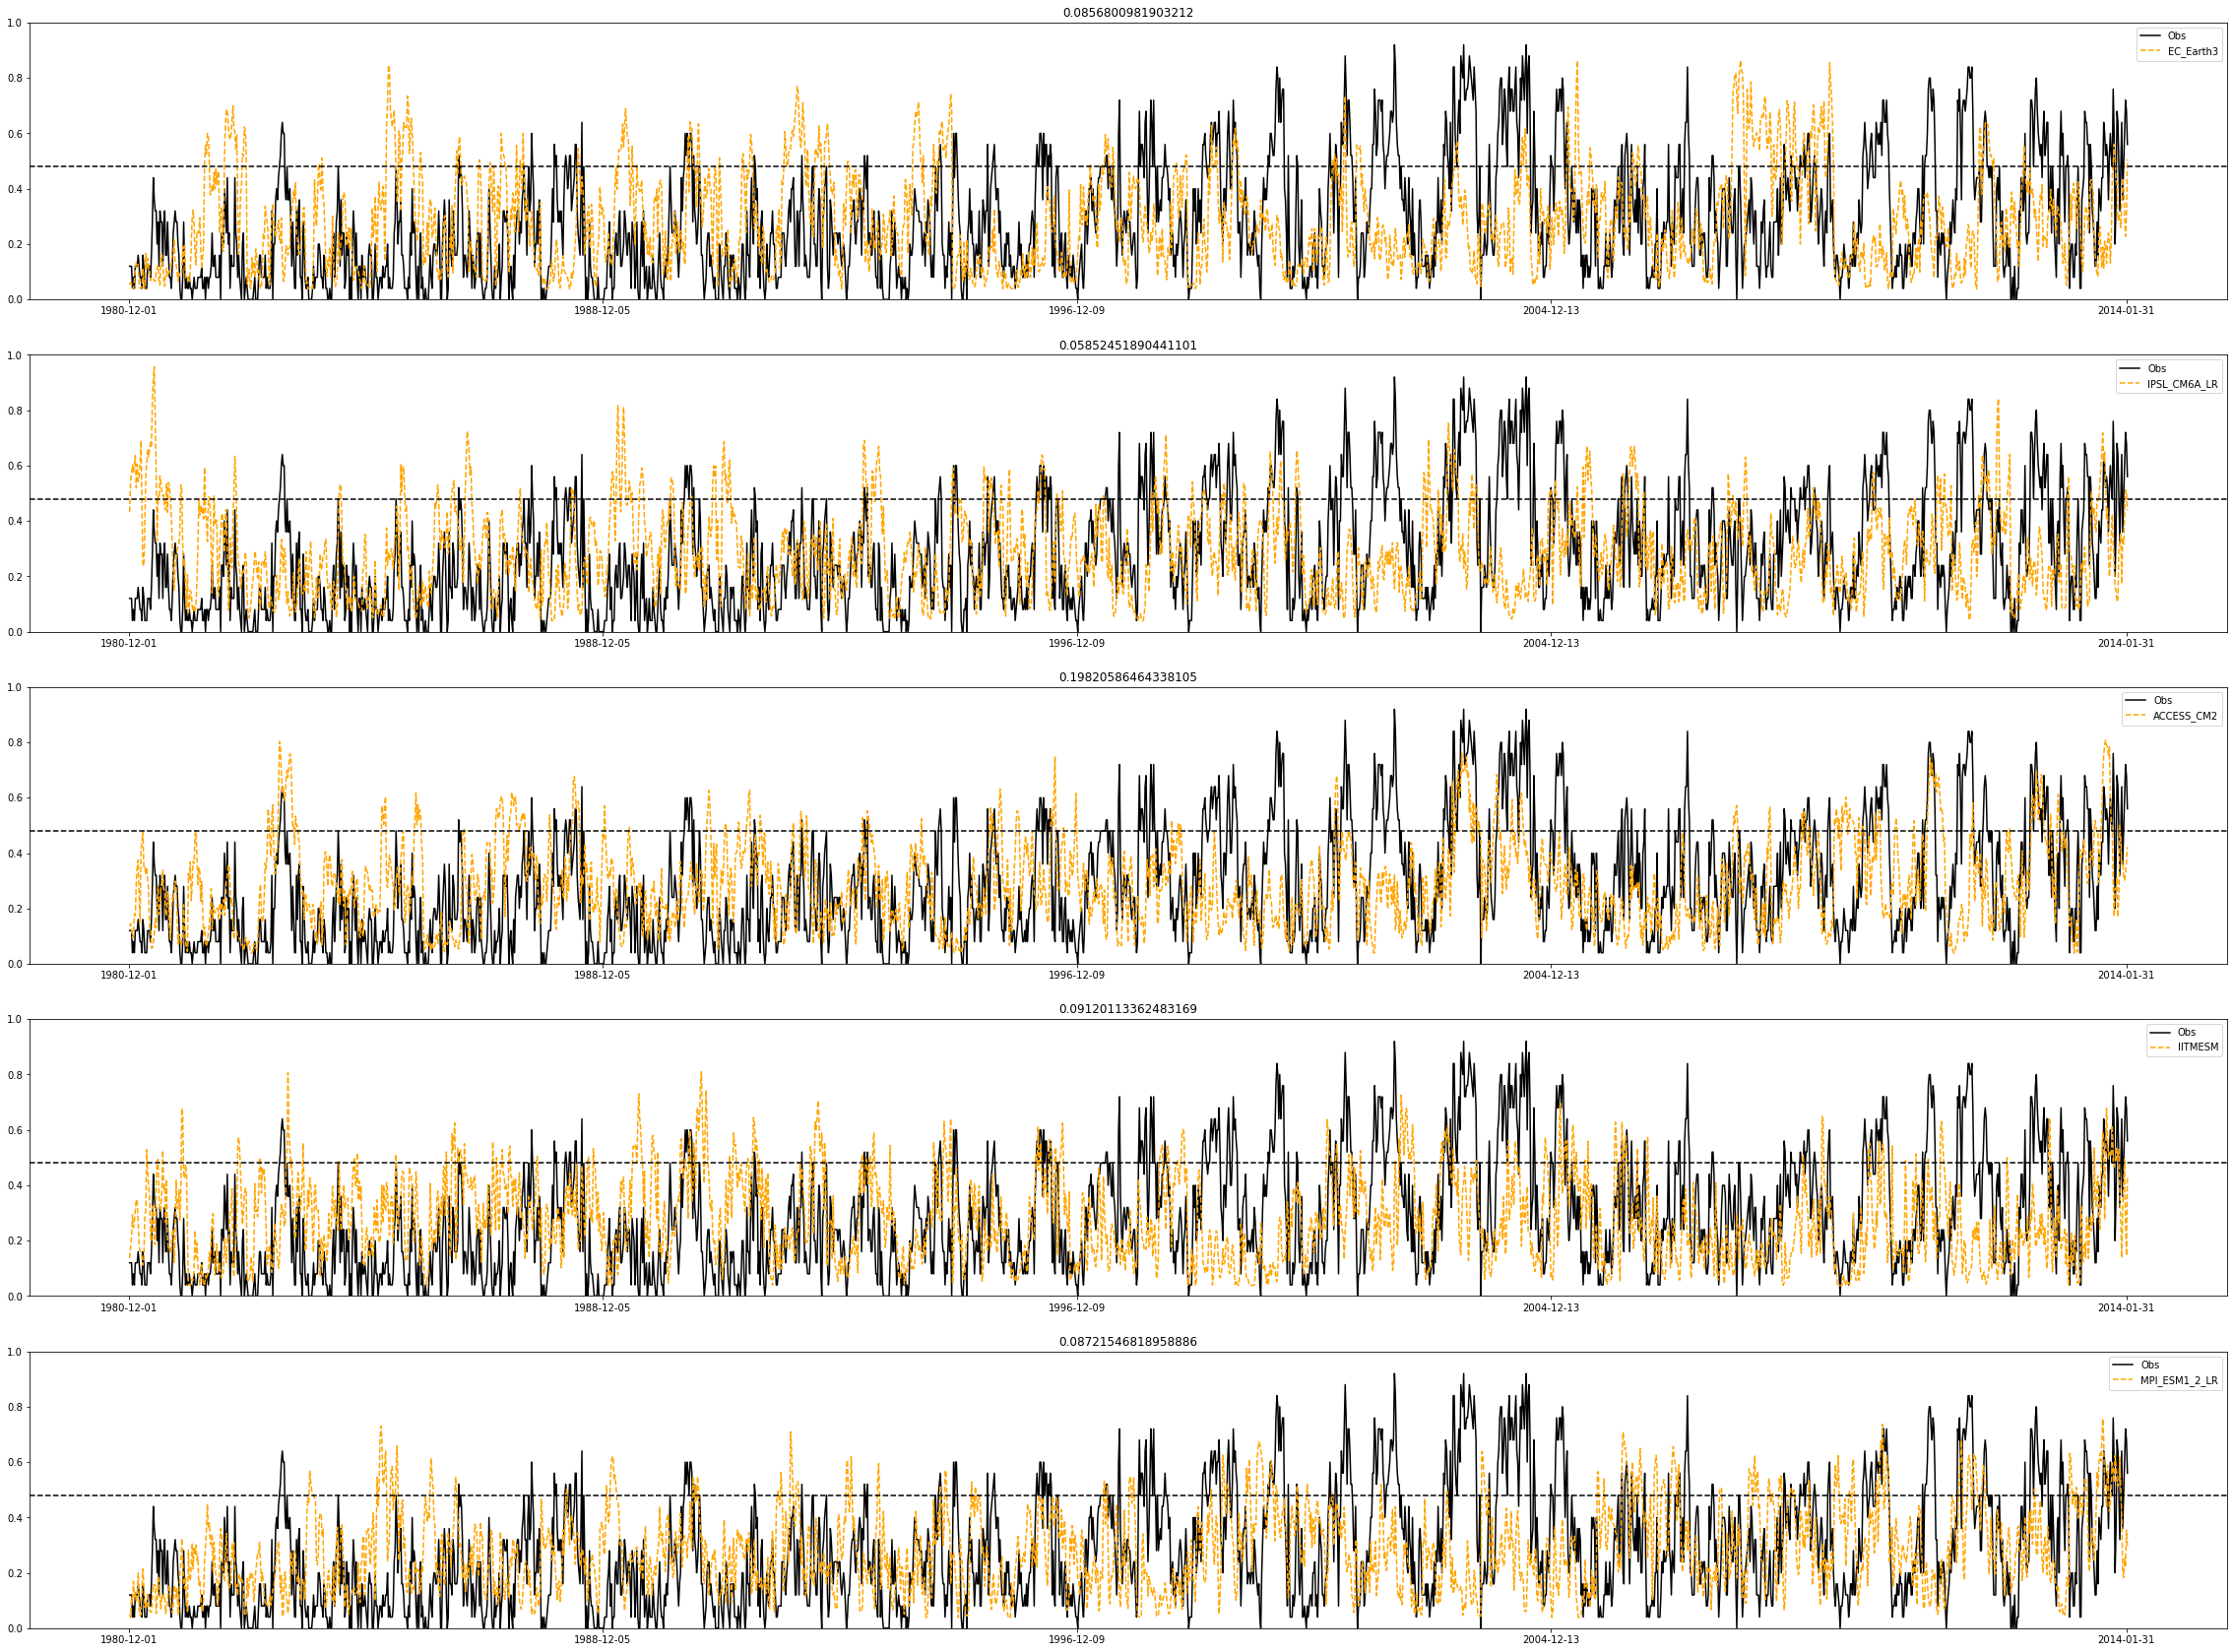

In [31]:
models=(EC_Earth3_CNN,IPSL_CM6A_LR_CNN,ACCESS_CM2_CNN,IITMESM_CNN,MPI_ESM1_2_LR_CNN)
modelNames=['EC_Earth3','IPSL_CM6A_LR','ACCESS_CM2','IITMESM',
            'MPI_ESM1_2_LR']

fig, ax = plt.subplots(5, 1,figsize=(40,30))
#plt.figure(figsize=(40,110))
X=np.arange(1,y.shape[0]+1)
for m,mn,ax1 in zip(models,modelNames,ax):
    ax1.plot(X,y,label='Obs',color='black')
    ax1.plot(X,m,label=mn,color='orange',ls='--')
    l1=ax1.axhline(0.48,color='black',ls='--')
    ax1.set_xticks([0,500,1000,1500,2107])
    ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2107]])
    ax1.set_ylim([0, 1])
    ax1.set_title(np.corrcoef(y,m)[0,1])
    ax1.legend()
plt.savefig('Models_dailyTS_models5.eps')
plt.show() 

    

In [21]:
timesteps=ACCESS_CM2_CNN.shape[0]

In [33]:
t=[ACCESS_CM2_CNN[10].values, CanESM5_CNN[10].values, IITMESM_CNN[10].values, INM_CM4_8_CNN[10].values,INM_CM5_0_CNN[10].values,
        IPSL_CM6A_LR_CNN[10].values, MIROC6_CNN[10].values,MRI_ESM2_0_CNN[10].values,
   MPI_ESM1_2_LR_CNN[10].values ,MPI_ESM1_2_HR_CNN[10].values,EC_Earth3_CNN[10].values]
print(np.amax(t))
print(np.max(t))

0.61328024
0.61328024


In [35]:
minVal=[]
maxVal=[]
meanVal=[]

for i in range(0,timesteps):
    #print(i)
    t=[ACCESS_CM2_CNN[i].values, CanESM5_CNN[i].values, IITMESM_CNN[i].values, INM_CM4_8_CNN[i].values,INM_CM5_0_CNN[i].values,
        IPSL_CM6A_LR_CNN[i].values, MIROC6_CNN[i].values,MRI_ESM2_0_CNN[i].values,
   MPI_ESM1_2_LR_CNN[i].values ,MPI_ESM1_2_HR_CNN[i].values,EC_Earth3_CNN[i].values]
    minVal.append(np.amin(t))
    maxVal.append(np.amax(t))
    meanVal.append(np.mean(t))

In [9]:
dateString=[]
for i in y.time.values :
    dateString.append(np.datetime_as_string(i, unit='D'))
dateString[2107]

'2014-01-31'

[[1.         0.71304569]
 [0.71304569 1.        ]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


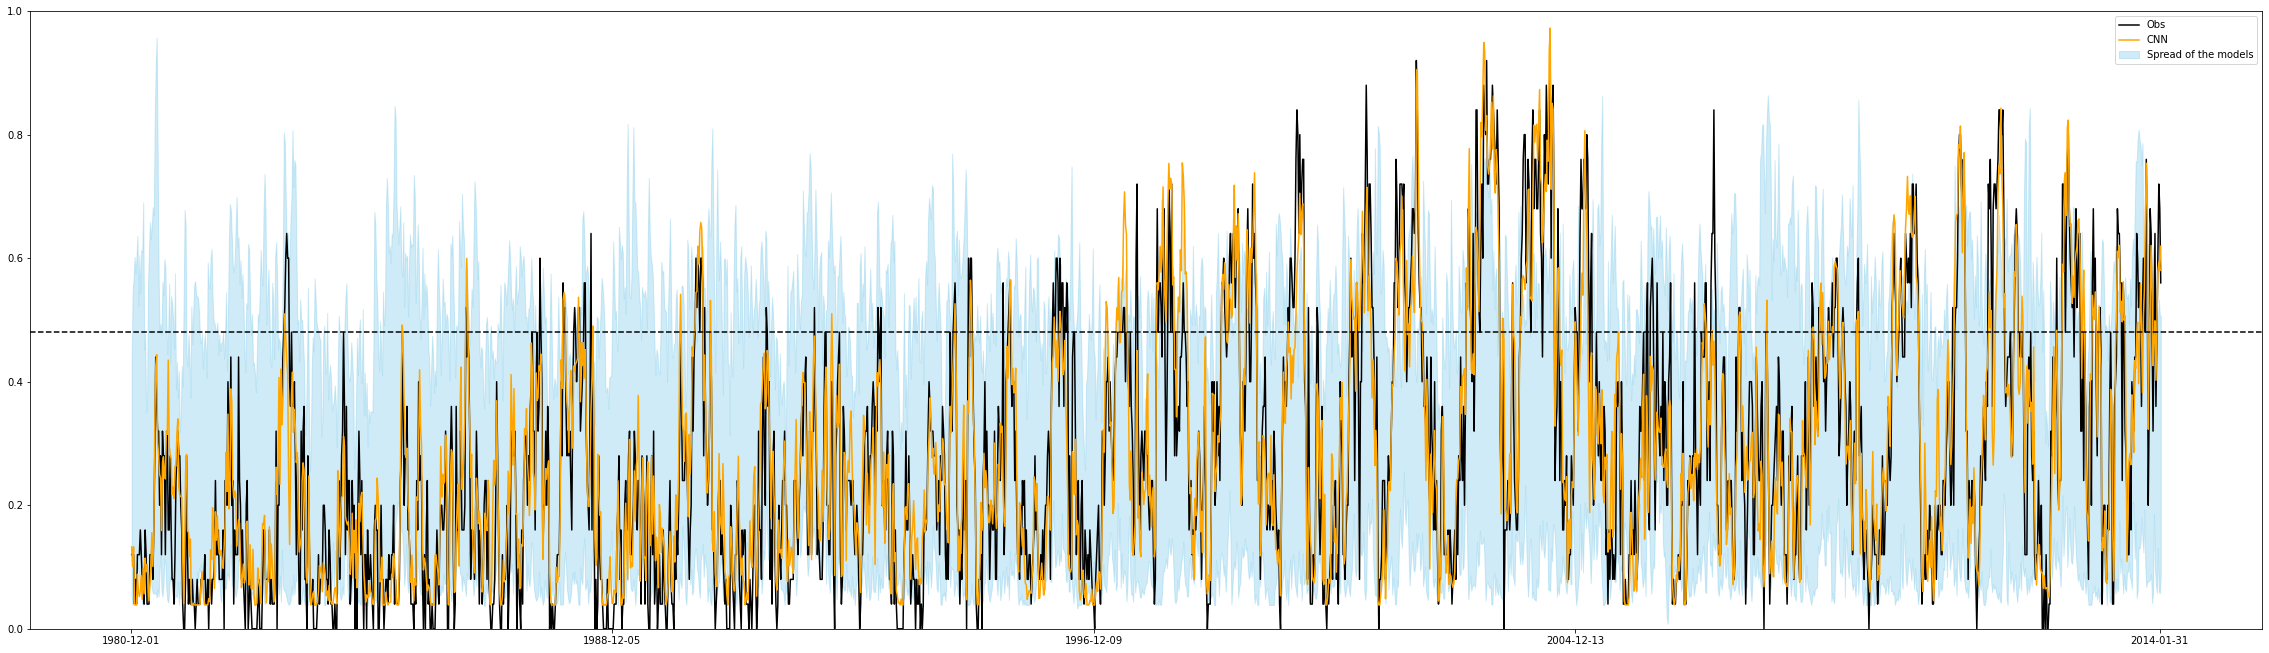

In [41]:
fig=plt.figure(figsize=[40,25])
X=np.arange(1,y.shape[0]+1)
#X=y.time.values
ax1 = fig.add_subplot(211)
ax1.plot(X,y,label='Obs',color='black')
ax1.plot(X,CNN,label='CNN',color='orange')
#ax1.plot(X,meanVal,label='ENSMean',color='red')
ax1.fill_between(X, maxVal,minVal,
                 color="skyblue", alpha=0.4,label='Spread of the models')
ax1.set_xticks([0,500,1000,1500,2107])
ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2107]])
l1=ax1.axhline(0.48,color='black',ls='--')
ax1.set_ylim([0, 1])
ax1.legend()
#ax1.set_title(np.corrcoef(y,LR)[0,1])
print(np.corrcoef(y,LR))
plt.savefig('Models_dailyTS.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[1.         0.71304569]
 [0.71304569 1.        ]]


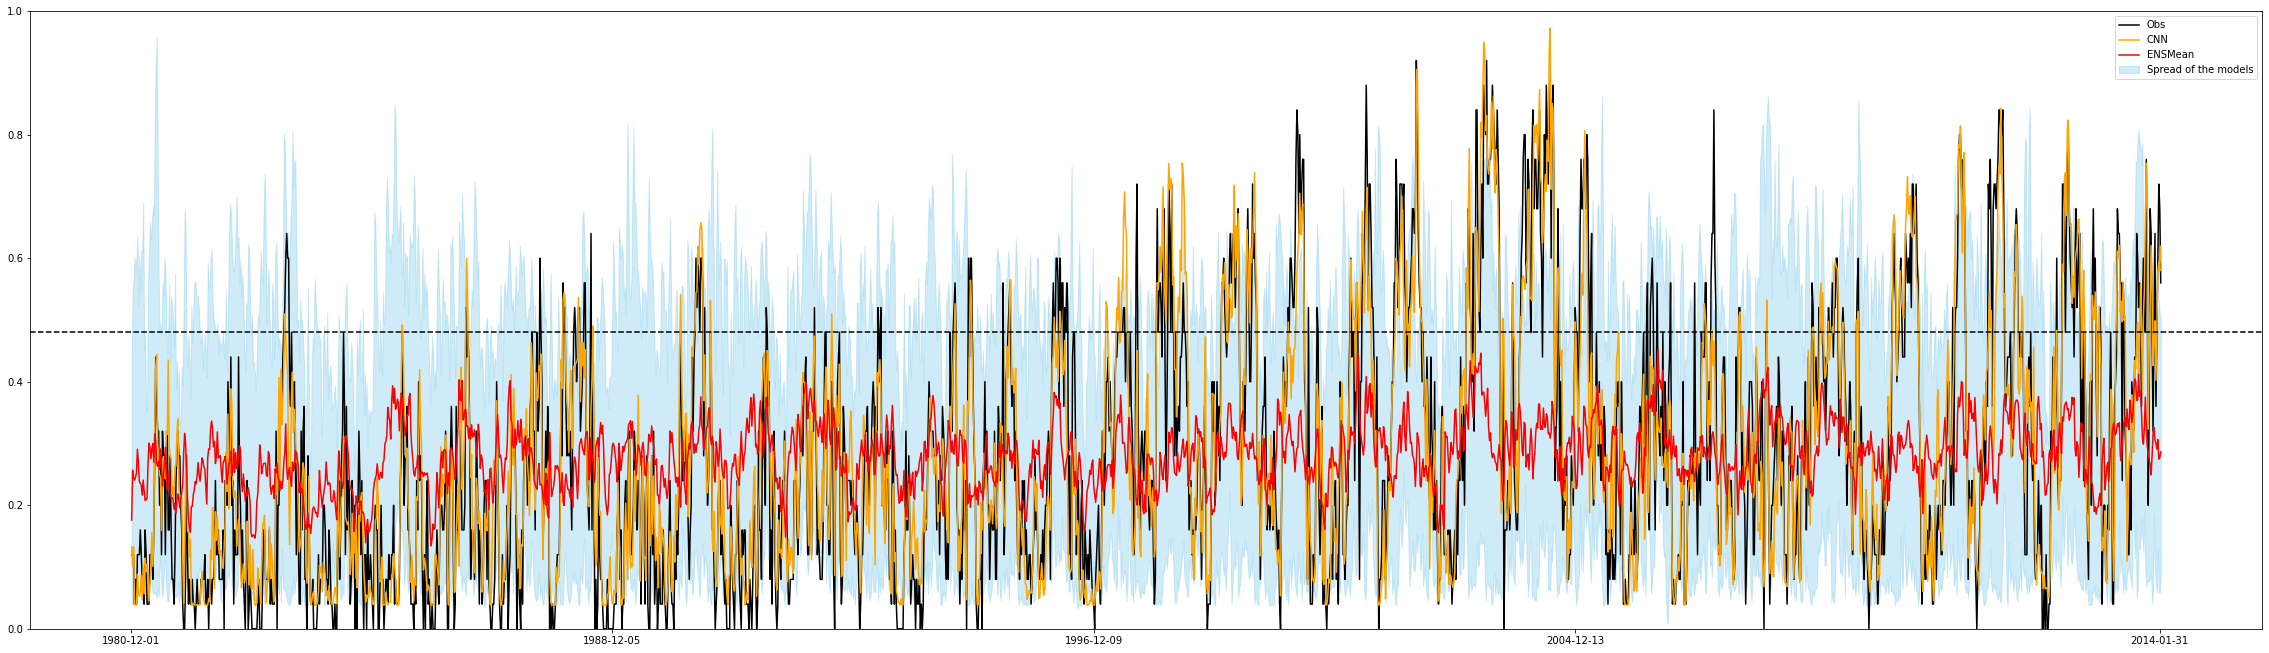

In [42]:
fig=plt.figure(figsize=[40,25])
X=np.arange(1,y.shape[0]+1)
#X=y.time.values
ax1 = fig.add_subplot(211)
ax1.plot(X,y,label='Obs',color='black')
ax1.plot(X,CNN,label='CNN',color='orange')
ax1.plot(X,meanVal,label='ENSMean',color='red')
ax1.fill_between(X, maxVal,minVal,
                 color="skyblue", alpha=0.4,label='Spread of the models')
ax1.set_xticks([0,500,1000,1500,2107])
ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2107]])
l1=ax1.axhline(0.48,color='black',ls='--')
ax1.set_ylim([0, 1])
ax1.legend()
#ax1.set_title(np.corrcoef(y,LR)[0,1])
print(np.corrcoef(y,LR))
plt.savefig('Models_dailyTSWithEnsemble.eps')